<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

x_train shape:  (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)
t_train:  [5 0 4 ... 5 6 8]
t_test:  [7 2 1 ... 4 5 6]


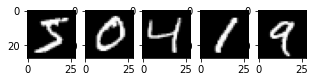

In [18]:
(x_train, t_train),(x_test, t_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

print('t_train: ', t_train)
print('t_test: ', t_test)

plt.figure(figsize=(5,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(x_train[i].reshape(28,28), cmap='gray')

plt.show()



데이터 전처리

In [3]:
# 데이터 정규화
x_train, x_test = (x_train - 0.0) / (255.0 - 0.0), (x_test - 0.0) / (255.0 - 0.0) 

모델구축

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1))) # 28x28크기의 이미지 100개씩
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

모델 컴파일

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

모델학습

In [6]:
model.fit(x_train, t_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 2ms/step - loss: 0.2900 - accuracy: 0.9070
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0452 - accuracy: 0.9859
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0272 - accuracy: 0.9913
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0203 - accuracy: 0.9929
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0153 - accuracy: 0.9953


모델평가

In [8]:
test_loss, test_acc = model.evaluate(x_test, t_test, verbose=2)

313/313 - 0s - loss: 0.0291 - accuracy: 0.9916


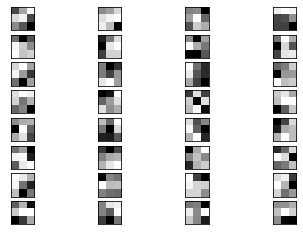

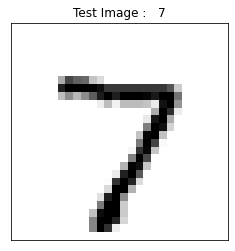

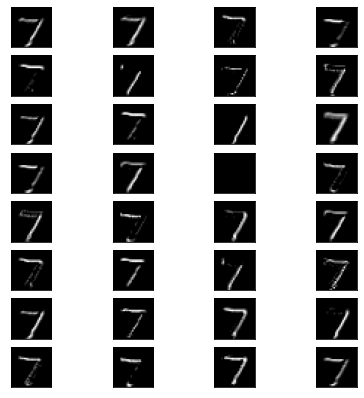

In [24]:
# 특정 layer에서 weights 추출
# 구문: (특정 layer).get_weights()
weight_1, bias_1 = model.layers[0].get_weights()
weight_1n = (weight_1 - weight_1.min())/(weight_1.max()-weight_1.min()) # normalize
n_filters = 32
plt.figure()
for i in range(n_filters):
    ax = plt.subplot(8,4,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(weight_1n[:,:,0,i],cmap='gray')
plt.show()

# 특정 layer이후 특성맵 추출
# 구문: keras.Model(input,(특정 layer).output)
img_original = x_test[0:1][:]
feature_extract = tf.keras.Model(inputs=model.inputs,outputs=model.layers[0].output)
img_feature = feature_extract.predict(img_original)

plt.figure()
plt.imshow(img_original[0,:,:,0], cmap=plt.cm.binary)
plt.title('Test Image :   '+str(t_test[0]))
plt.xticks([])
plt.yticks([])

fig, axs = plt.subplots(8, 4,figsize=(7,7))
n = 0
for i in range(8):
    for j in range(4):
        axs[i,j].imshow(img_feature[0,:,:,n],cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        n += 1
plt.show()


